<h1 align="center"> Emotion Analysis in RSS News <h1>

In [1]:
%matplotlib notebook
%config InlineBackend.close_figures = False
import main
import ipywidgets as widgets
from ipywidgets import *
from IPython.display import display
from IPython.display import clear_output
from IPython.display import Javascript
import matplotlib.pyplot as plt
from IPython.core.display import HTML

fig_size = []
fig_size.append(9)
fig_size.append(5)
plt.rcParams["figure.figsize"] = fig_size

def css_styling():
    styles = open("custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

<h2 align="center"> Selection of the days interval for the analysis <h2>

In [2]:
daystart = None
dayend = None
dayinterval = main.makelast30days(main.dayslist)

def setstart(start):
    global daystart
    daystart = start

def setend(end):
    global dayend
    dayend = end

choosestart = widgets.Select(options=main.dayslist,value=main.dayslist[len(main.dayslist)-31])
chooseend = widgets.Select(options=main.dayslist,value=main.dayslist[len(main.dayslist)-1])
choosestart.layout.width='100%'
chooseend.layout.width='100%'

i = widgets.interactive(setstart,start=choosestart)
j = widgets.interactive(setend,end=chooseend)

n = HBox([VBox([i]),VBox([j])])
display(n)




In [3]:
def set_interval(sender):
    global daystart,dayend,dayinterval
    dayinterval = main.makedayinterval(daystart,dayend)
    main.setdayinterval(dayinterval)
    display(Javascript('IPython.notebook.execute_cells_below()'))
    clear_output()
    print("Selected interval: "+ daystart +" to "+dayend)

intervalbutton = widgets.Button(description='Save Interval')
intervalbutton.layout.width='90%'
intervalbutton.on_click(set_interval)
display(intervalbutton)

Selected interval: 2017 - 02 - 28 to 2017 - 04 - 03


<h2 align="center"> Selection of the terms of the search <h2>

In [16]:
text = widgets.Text(placeholder="Insert the CED words separated by commas")
text.layout.width='100%'
display(text)
def handle_submit(sender):
    clear_output()
    newced = main.parseinput(text.value)
    main.setcedwords(newced)
    print ("the new CED is: "+ str(newced))
    display(Javascript('IPython.notebook.execute_cells_below()'))

text.on_submit(handle_submit)

<IPython.core.display.Javascript object>

<h2 align="center"> Emotion Graph <h2>

<IPython.core.display.Javascript object>


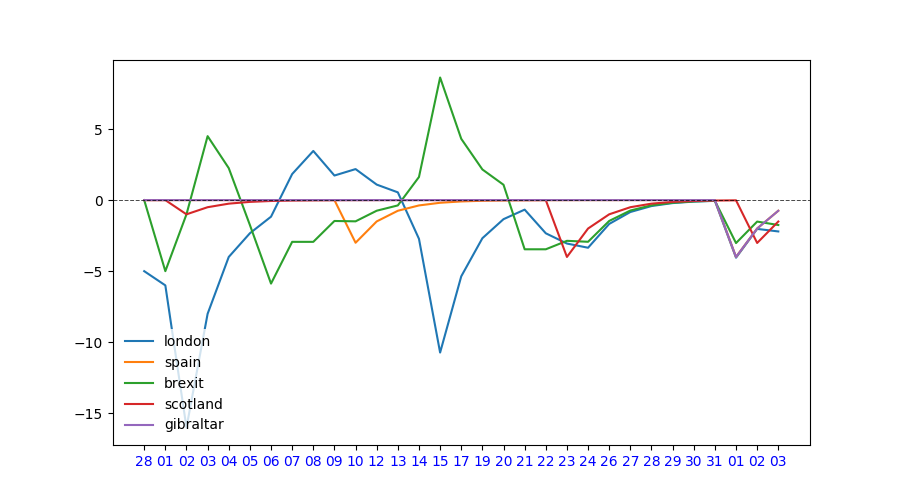

In [17]:
e = 0.5
emfig = plt.figure("Emotions")

def g(Epsilon):
    global e
    e = Epsilon
    
def on_button_clicked(b):
    global e
    main.EmotionAnalysis(e,emfig)

In [18]:
b = interact(g,Epsilon = FloatSlider(min=0,max=1,step=0.001,width='100%',value=0.5))
button = widgets.Button(description = "DRAW!")
display(button)
button.on_click(on_button_clicked)

<h2 align="center"> Relationship Graph <h2>

<IPython.core.display.Javascript object>


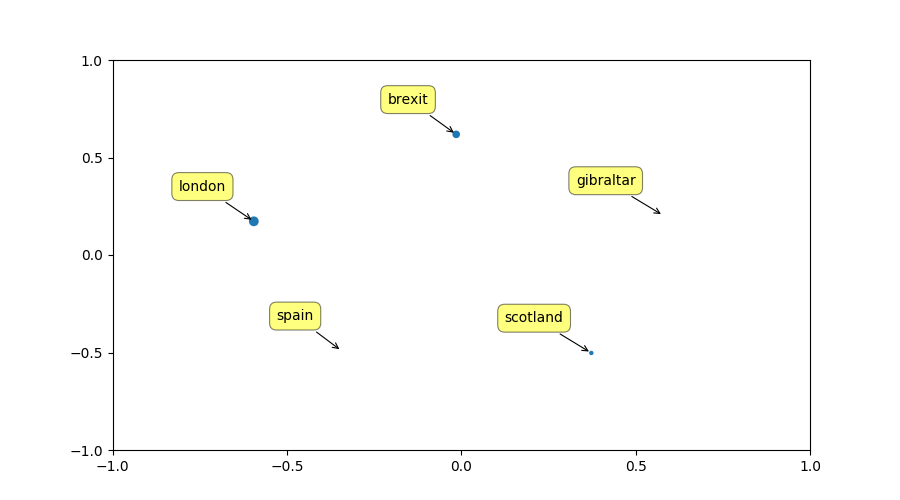

In [19]:
def dayrel(day):
    global relfig,dayinterval
    main.RelationDay(day,relfig)
    print(dayinterval[day])
relfig = plt.figure("Relations")

In [20]:
interact(dayrel,day=IntSlider(min=0,max=len(main.relationsmatrixes)-1,step=1,value=0,width='100%'))

(-0.65882100485411266, 0.63843436105051221, -0.56306213915711811, 0.68224484596433865)
(-1.0, 1.0, -1.0, 1.0)
2017 - 03 - 02


<h2 align="center"> Summary of Relations<h2>

<IPython.core.display.Javascript object>


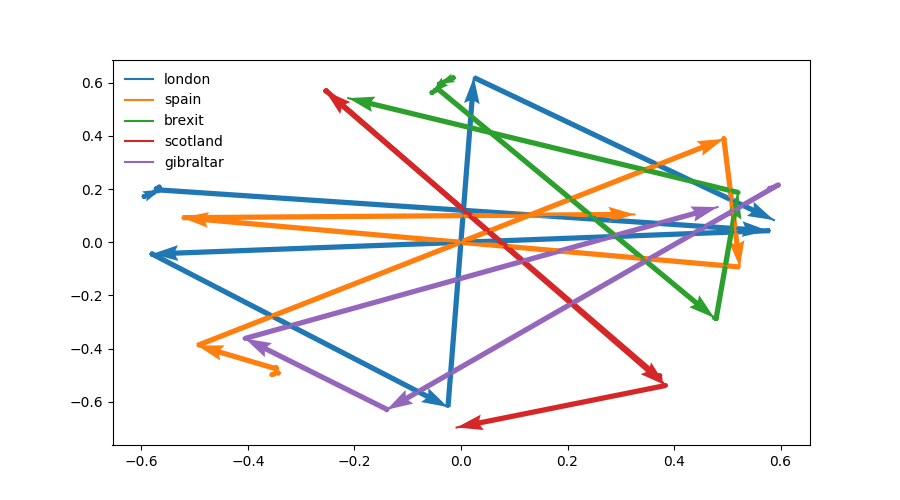

Current size: [9.0, 5.0]


In [21]:
sumfig = plt.figure("Summary of Relations")
main.RelationSummary(sumfig)